In [2]:
import torch
import torchvision

In [3]:
torch.cuda.is_available()

True

In [6]:
trainset = torchvision.datasets.CIFAR10(root= './data', train=True, download=True) #root es la carpeta donde lo va a descaargar



Extracting ./data/cifar-10-python.tar.gz to ./data


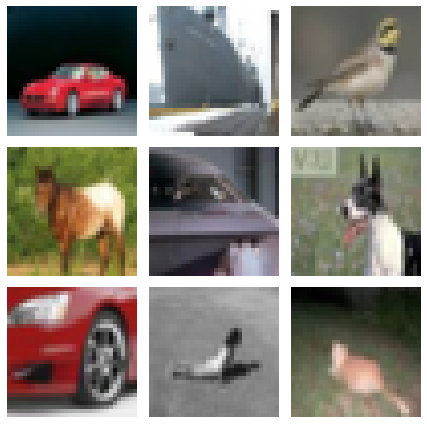

In [23]:
import random
import matplotlib.pyplot as plt

r,c =3, 5

fig= plt.figure(figsize=(2*c,2*r)) #aumenta el tamaño 
for _r in range(r):
  for _c in range (r):
    ax= plt.subplot(r,c,_r*c + _c +1)  
    ix=random.randint(0, len(trainset))
    img,label = trainset[ix]
    plt.axis("off")
    plt.imshow(img)
plt.tight_layout()
plt.show()

trasnformaciones


In [26]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomCrop((28,28)),
        torchvision.transforms.Resize((32,32)),
        torchvision.transforms.RandomHorizontalFlip(),
        # ...
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)



 #lo mismo de arriba pero haciendo un par de transformaciones

Files already downloaded and verified


<function matplotlib.pyplot.show>

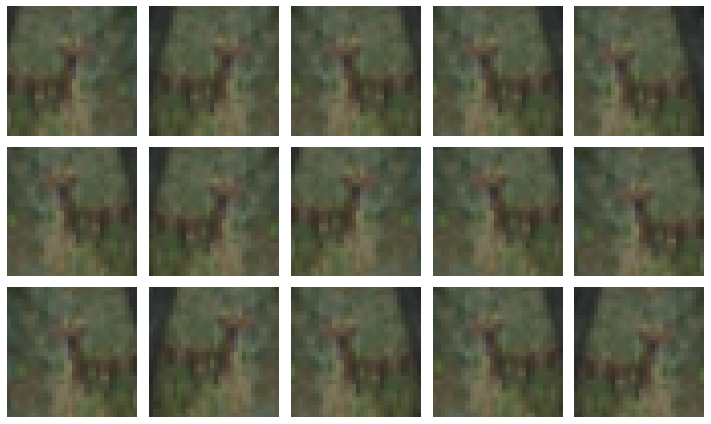

In [35]:
r,c = 3,5
fig = plt.figure(figsize=(2*c,2*r))

for _r in range(r):
  for _c in range(c):
      ax=plt.subplot(r,c,_r*c + _c+1)
      ix=10
      img, label = trainset[ix]
      plt.axis("off")
      #desnormalizar
      img = img*0.5 +0.5
      img = img.permute(1,2,0)
      plt.imshow(img)
plt.tight_layout()
plt.show      

In [38]:
#sacando un red ya tabulada
resnet= torchvision.models.resnet18()




In [41]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
#descargar la vaina pre entrenada ya

resnet= torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [43]:
#modificanco capa porque esa tiene mil salidas y queremos por ejemplo 10

num_classes= 10
resnet.fc = torch.nn.Linear(resnet.fc.in_features,num_classes)
resnet


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [45]:
#operaciones comunes en vision atificial
box1= torch.tensor([[0,0,1,1],[0,0,0.5,0.5]])
box2= torch.tensor([[0,0,1,1],[0.5,0.5,1,1]])

torchvision.ops.box_iou(box1,box2)

tensor([[1.0000, 0.2500],
        [0.2500, 0.0000]])